In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import comb
from random import choices

In [2]:
def bino_dist(rate, roll):
    res = 0
    for i in range(1, roll+1):
        res += comb(roll, i) * rate**i * (1-rate)**(roll-i)
    return [roll, res]

In [3]:
fourstar_char_baseprob = 0.051
fourstar_char_softpity = 0.561
fivestar_char_baseprob = 0.006

In [4]:
fourstar_char_nopity = []
for i in range(1, 101):
    fourstar_char_nopity.append(bino_dist(fourstar_char_baseprob, i))
df = pd.DataFrame.from_records(fourstar_char_nopity, columns=['num_rolls', 'probability_no_pity'])

In [5]:
fivestar_char_nopity = []
for i in range(1, 1001):
    fivestar_char_nopity.append(bino_dist(fivestar_char_baseprob, i))
df4 = pd.DataFrame.from_records(fivestar_char_nopity, columns=['num_rolls', 'probability_no_pity'])

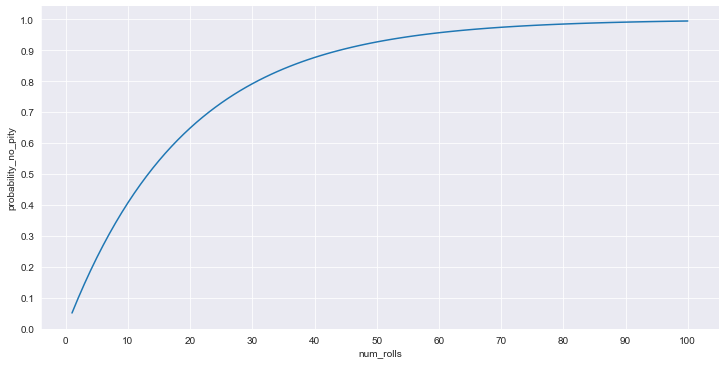

In [6]:
sns.set_style('darkgrid')
ax = sns.relplot(data=df, x='num_rolls', y='probability_no_pity', kind='line', aspect=20/10)
ax.set(xticks=np.arange(0, 110, 10), yticks=np.arange(0, 1.1, 0.1))
title = 'Probability of pulling at least 1 4-star character and above in no-pity system'
plt.show()

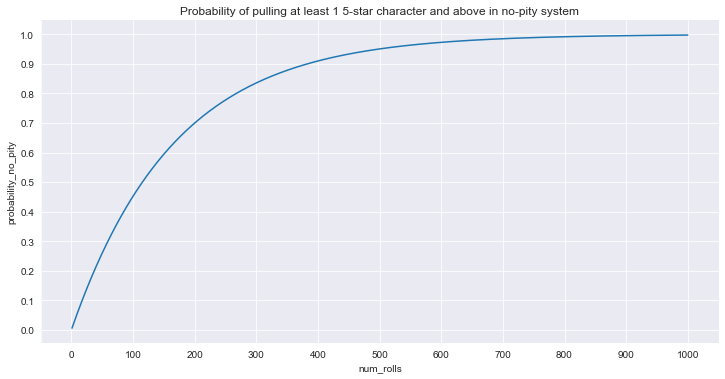

In [7]:
ax = sns.relplot(data=df4, x='num_rolls', y='probability_no_pity', kind='line', aspect=20/10)
ax.set(xticks=np.arange(0, 1010, 100), yticks=np.arange(0, 1.1, 0.1))
title = 'Probability of pulling at least 1 5-star character and above in no-pity system'
plt.title(title)
plt.show()

In [8]:
fourstar_char_hardpity = []
for i in range(1, 9):
    fourstar_char_hardpity.append([i, 1-(1-0.051)**(i-1)])
fourstar_char_hardpity.append([10, 1.00])
df2 = pd.DataFrame.from_records(fourstar_char_hardpity, columns=['num_rolls', 'probability_with_hardpity'])

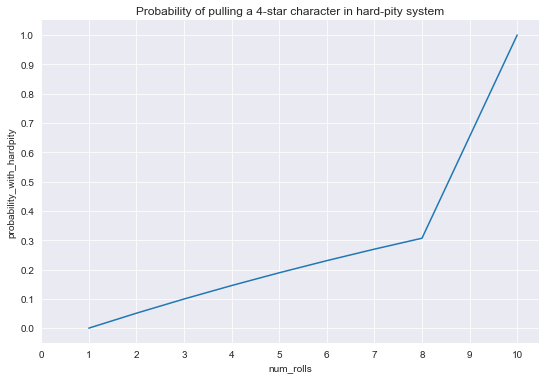

In [9]:
ax = sns.relplot(data=df2, x='num_rolls', y='probability_with_hardpity', kind='line', aspect=15/10)
ax.set(xticks=np.arange(0, 11, 1), yticks=np.arange(0, 1.1, 0.1))
title = 'Probability of pulling a 4-star character in hard-pity system'
plt.title(title)
plt.show()

In [10]:
fivestar_char_hardpity = []
for i in range(1, 90):
    fivestar_char_hardpity.append([i, 1-(1-0.006)**(i-1)])
fivestar_char_hardpity.append([90, 1.00])
df5 = pd.DataFrame.from_records(fivestar_char_hardpity, columns=['num_rolls', 'probability_with_hardpity'])

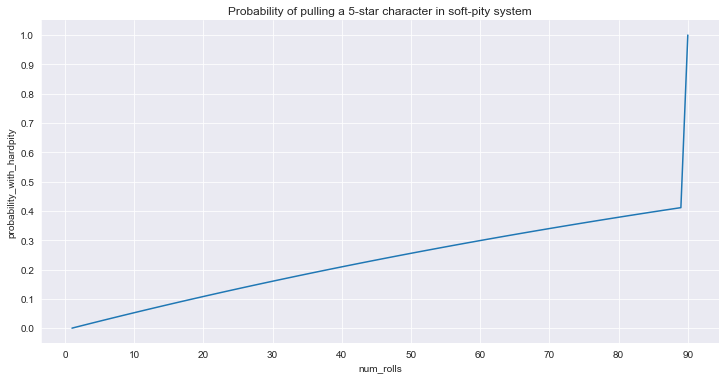

In [11]:
ax = sns.relplot(data=df5, x='num_rolls', y='probability_with_hardpity', kind='line', aspect=20/10)
ax.set(xticks=np.arange(0, 91, 10), yticks=np.arange(0, 1.1, 0.1))
title = 'Probability of pulling a 5-star character in soft-pity system'
plt.title(title)
plt.show()

In [12]:
fourstar_char_pity = []
for i in range(1, 9):
    fourstar_char_pity.append([i, 1-(1-0.051)**(i-1)])
fourstar_char_pity.append([9, 1-(1-0.561)*(1-0.051)**8])
fourstar_char_pity.append([10, 1])
df3 = pd.DataFrame.from_records(fourstar_char_pity, columns=['num_rolls', 'probability_with_pity'])

In [13]:
fivestar_char_pity = []
for i in range(1, 74):
    fivestar_char_pity.append([i, 1-(1-0.006)**(i-1)])
base = (1-0.006)**73
for i in range(74, 90):
    base *= 1-((i-73)*0.06+0.006)
    fivestar_char_pity.append([i, 1-base])
fivestar_char_pity.append([90, 1])
df6 = pd.DataFrame.from_records(fivestar_char_pity, columns=['num_rolls', 'probability_with_pity'])

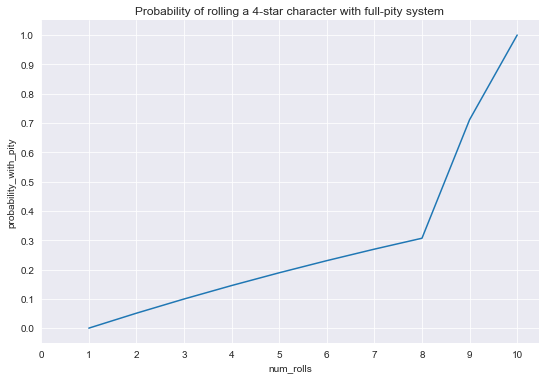

In [14]:
title = 'Probability of rolling a 4-star character with full-pity system'
ax = sns.relplot(data=df3, x='num_rolls', y='probability_with_pity', kind='line', aspect=15/10)
ax.set(xticks=np.arange(0, 11, 1), yticks=np.arange(0, 1.1, 0.1))
plt.title(title)
plt.show()

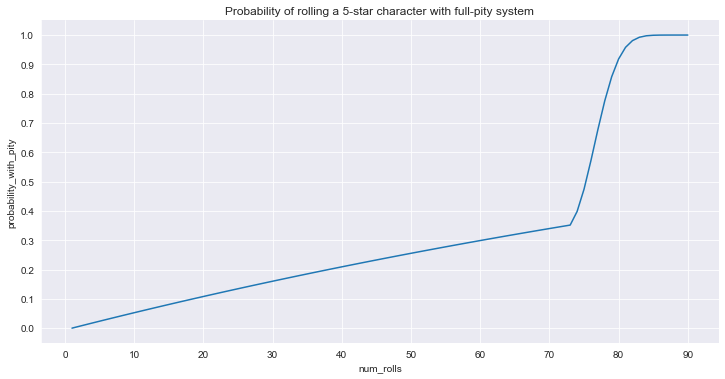

In [15]:
title = 'Probability of rolling a 5-star character with full-pity system'
ax = sns.relplot(data=df6, x='num_rolls', y='probability_with_pity', kind='line', aspect=20/10)
ax.set(xticks=np.arange(0, 91, 10), yticks=np.arange(0, 1.1, 0.1))
plt.title(title)
plt.show()

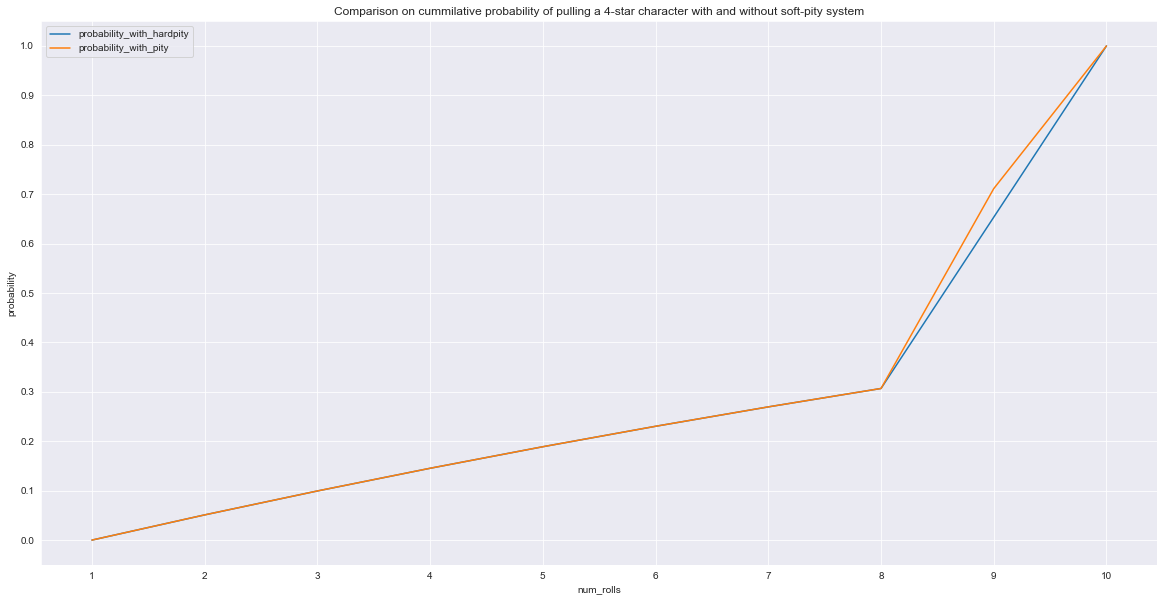

In [20]:
title = 'Comparison on cummilative probability of pulling a 4-star character with and without soft-pity system'
ax = df2.plot(x='num_rolls', y='probability_with_hardpity', kind='line', figsize=(20, 10), ylabel='probability', title=title, xticks=np.arange(0, 11, 1), yticks=np.arange(0, 1.1, 0.1))
df3.plot(x='num_rolls', y='probability_with_pity', kind='line', ax=ax)
plt.show()

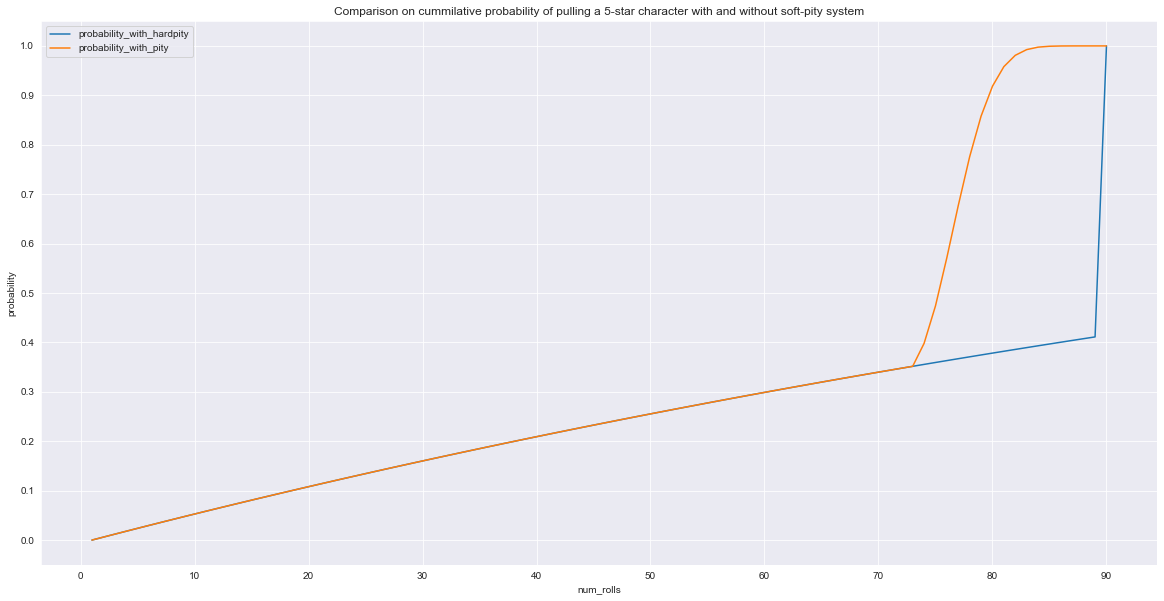

In [19]:
title = 'Comparison on cummilative probability of pulling a 5-star character with and without soft-pity system'
ax = df5.plot(x='num_rolls', y='probability_with_hardpity', kind='line', figsize=(20, 10), ylabel='probability', title=title, xticks=np.arange(0, 91, 10), yticks=np.arange(0, 1.1, 0.1))
df6.plot(x='num_rolls', y='probability_with_pity', kind='line', ax=ax)
plt.show()

In [21]:
four_star_per_pull_with_all_pity = []
for i in range(1, 11):
    if i < 9:
        four_star_per_pull_with_all_pity.append([i, fourstar_char_baseprob])
    elif i < 10:
        four_star_per_pull_with_all_pity.append([i, fourstar_char_baseprob*11])
    else:
        four_star_per_pull_with_all_pity.append([i, 1])
df4 = pd.DataFrame.from_records(four_star_per_pull_with_all_pity, columns=['num_rolls', 'perpull_prob_with_all_pity'])

In [22]:
fivestar_per_pull_with_all_pity = []
buffer = 0.006
for i in range(1, 74):
    fivestar_per_pull_with_all_pity.append([i, fivestar_char_baseprob])
for i in range(74, 90):
    buffer += 0.06
    fivestar_per_pull_with_all_pity.append([i, buffer])
fivestar_per_pull_with_all_pity.append([90, 1])
df7 = pd.DataFrame.from_records(fivestar_per_pull_with_all_pity, columns=['num_rolls', 'perpull_prob_with_all_pity'])

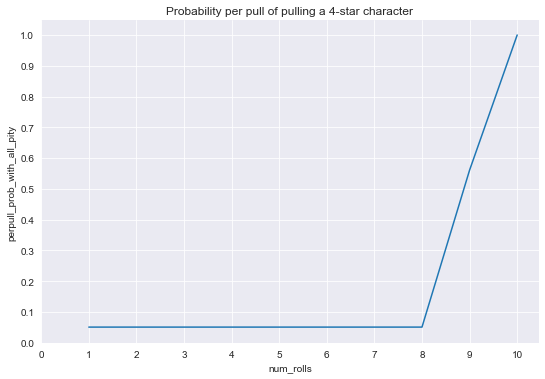

In [23]:
ax = sns.relplot(data=df4, x='num_rolls', y='perpull_prob_with_all_pity', kind='line', aspect=15/10)
ax.set(xticks=np.arange(0, 11, 1), yticks=np.arange(0, 1.1, 0.1))
title = 'Probability per pull of pulling a 4-star character'
plt.title(title)
plt.show()

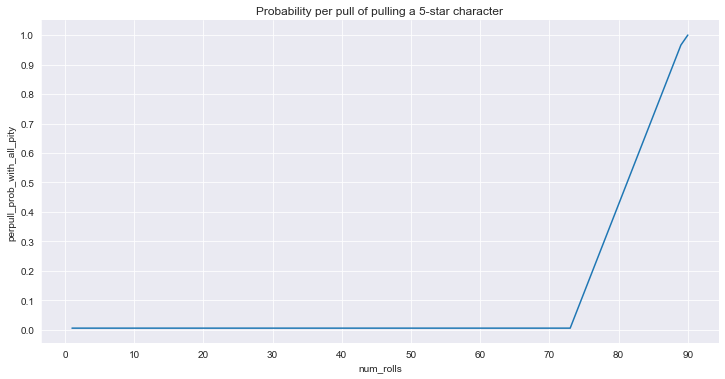

In [24]:
ax = sns.relplot(data=df7, x='num_rolls', y='perpull_prob_with_all_pity', kind='line', aspect=20/10)
ax.set(xticks=np.arange(0, 91, 10), yticks=np.arange(0, 1.1, 0.1))
title = 'Probability per pull of pulling a 5-star character'
plt.title(title)
plt.show()

In [36]:
threestar_base_prob = 0.943
fourstar_base_prob = 0.051
fivestar_base_prob = 0.006
num_threestar = 0
num_fourstar = 0
num_fivestar = 0
population = [3, 4, 5]
weight = [0.943, 0.051, 0.006]
i = 0
j = 1
k = 1
l = []
while k < min(91, 1000001-i):
    while j < min(11, 1000004-i):
        weight = [threestar_base_prob, fourstar_base_prob, fivestar_base_prob]
        rng = choices(population, weight)
        l.append(rng)
        if rng == [5]:
            fivestar_base_prob = 0.006
            threestar_base_prob = 1-fivestar_base_prob-fourstar_base_prob
            num_fivestar += 1
            i += 1
            j += 1
            k = 0
        if rng == [4]:
            fourstar_base_prob = 0.051
            threestar_base_prob = 1-fourstar_base_prob-fivestar_base_prob
            i += 1
            k += 1
            j = 0
            num_fourstar += 1
        if rng == [3]:
            num_threestar += 1
            i += 1
            j += 1
            k += 1
            if k == 89:
                threestar_base_prob = 0
                fourstar_base_prob = 0
                fivestar_base_prob = 1
            if k >= 73:
                threestar_base_prob -= 0.06
                fivestar_base_prob += 0.06
            if j == 8:
                threestar_base_prob -= 0.51
                fourstar_base_prob += 0.51
            if j == 9:
                threestar_base_prob = 0
                fourstar_base_prob = 1
                threestar_base_prob = 0
        if j == 10:
            j = 0
        if k == 90:
            k = 0

In [37]:
len(np.array(l))

1000000

In [38]:
num_threestar

853695

In [39]:
num_fourstar

130287

In [40]:
num_fivestar

16018

In [41]:
fourstar_consolidated_prob = num_fourstar/len(l)
fivestar_consolidated_prob = num_fivestar/len(l)

In [42]:
fourstar_consolidated_prob

0.130287

In [43]:
fivestar_consolidated_prob

0.016018

In [44]:
expected_four_star = 1/fourstar_consolidated_prob
expected_five_star = 1/fivestar_consolidated_prob

In [45]:
expected_four_star

7.675362852778866

In [46]:
expected_five_star

62.42976651267324